# ARIMA PREDICTION WITH PERSONAL LIBRARY

------

This notebook is based on the ArimaPredictor personnal library

The ArimaPredictor Object is able to : 

- load data series
- Assess stationarity based on kpss or ADF test
- Plot the PACF | ACF curve
- Study the AIC and BIC
- plot tools and summary of data
- fit an ARIMA or SARIMA model depending
- predict and plot the data
- make gridsearch

------

# Import and data load

### Import

In [1]:
import os
import pandas as pd
from arima_predictor import ArimaPredictor

In [2]:
cwd = os.getcwd()
cwd

'/Users/manulabricole/Documents/CDN/MachineLearning/ML6'

### data load

In [3]:
data_path = os.path.join(cwd, "data/AirPassengers.csv")

In [4]:
df = pd.read_csv(data_path)
df.set_index("Month", inplace=True)
df = df.rename(columns={'#Passengers': 'Passengers'})
df.index = pd.to_datetime(df.index).to_period('D').to_timestamp()
df

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


# Predictor Object --> TimeSeries data check

### Initialize object

In [5]:
predictor = ArimaPredictor()

[ArimaPredictor] Created


### Load data

In [6]:
predictor.load_data(df)

[ArimaPredictor] DataFrame loaded...


## Check Stationarity 

### differenciate = 0

In [7]:
predictor.check_data_stationarity()

[ArimaPredictor] Checking data stationarity...
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Data is not stationary
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
KPSS Statistic: 1.6513122354165206
p-value: 0.01
num lags: 8
Critical values:
	10% : 0.347
	5% : 0.463
	2.5% : 0.574
	1% : 0.739
Data is not stationary
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°



/Users/manulabricole/Documents/CDN/MachineLearning/ML6/arima_predictor.py:223: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(data, regression='c')


### differenciate = 1

In [8]:
predictor.check_data_stationarity(data=df.diff().dropna())

[ArimaPredictor] Checking data stationarity...
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Data is not stationary
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
KPSS Statistic: 1.6513122354165206
p-value: 0.01
num lags: 8
Critical values:
	10% : 0.347
	5% : 0.463
	2.5% : 0.574
	1% : 0.739
Data is not stationary
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°



/Users/manulabricole/Documents/CDN/MachineLearning/ML6/arima_predictor.py:223: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(data, regression='c')


### differenciate = 2

In [9]:
predictor.check_data_stationarity(data=df.diff().diff().dropna())

[ArimaPredictor] Checking data stationarity...
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
Data is not stationary
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°

°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
KPSS Statistic: 1.6513122354165206
p-value: 0.01
num lags: 8
Critical values:
	10% : 0.347
	5% : 0.463
	2.5% : 0.574
	1% : 0.739
Data is not stationary
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°



/Users/manulabricole/Documents/CDN/MachineLearning/ML6/arima_predictor.py:223: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  statistic, p_value, n_lags, critical_values = kpss(data, regression='c')


## Plot data

[ArimaPredictor] Plotting data curves...
[ArimaPredictor] Rolling 1:  6
[ArimaPredictor] Rolling 2:  12
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
Coefficient b: 102.18781094527367
Coefficient a: 2.66650768712827
°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°°
EXPECTING --> a = 0 <-- for stationarity


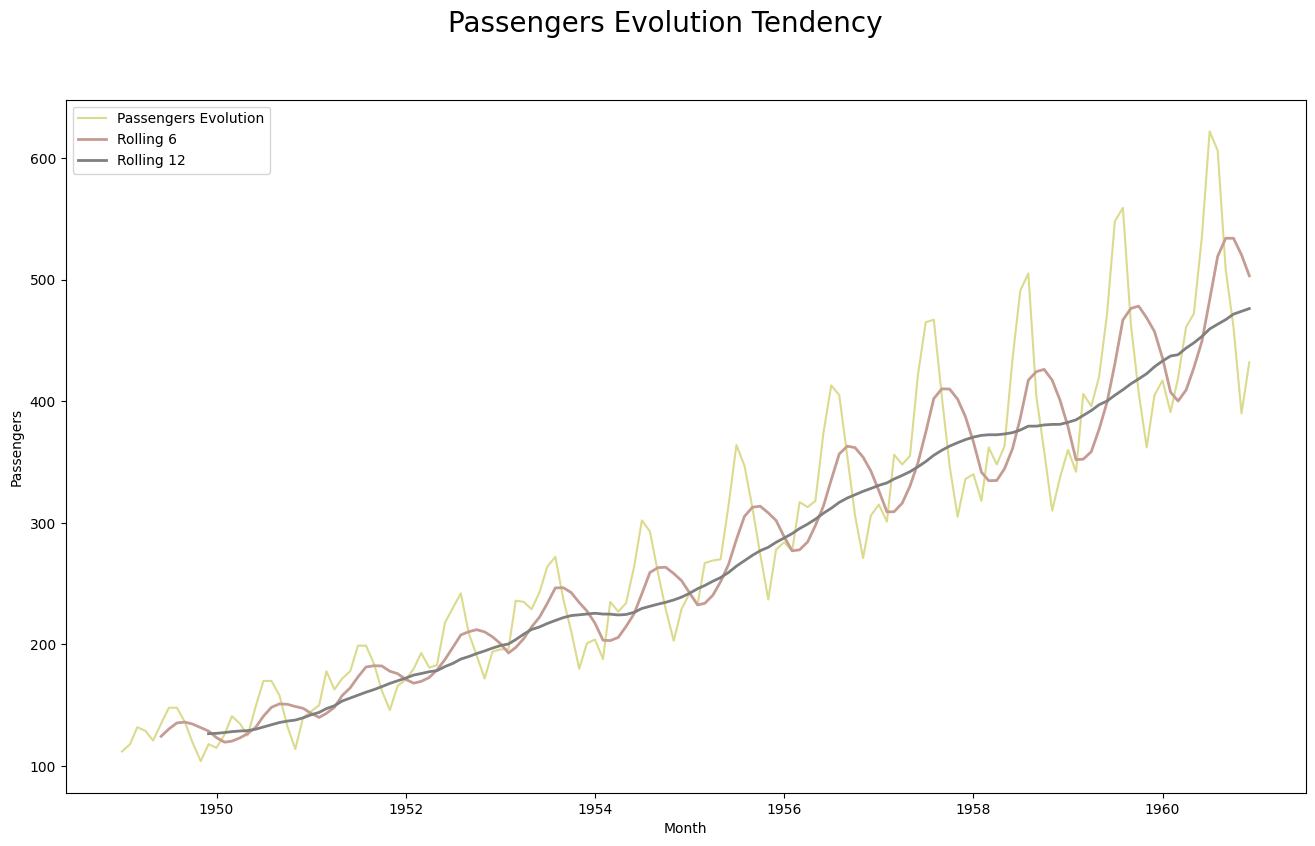

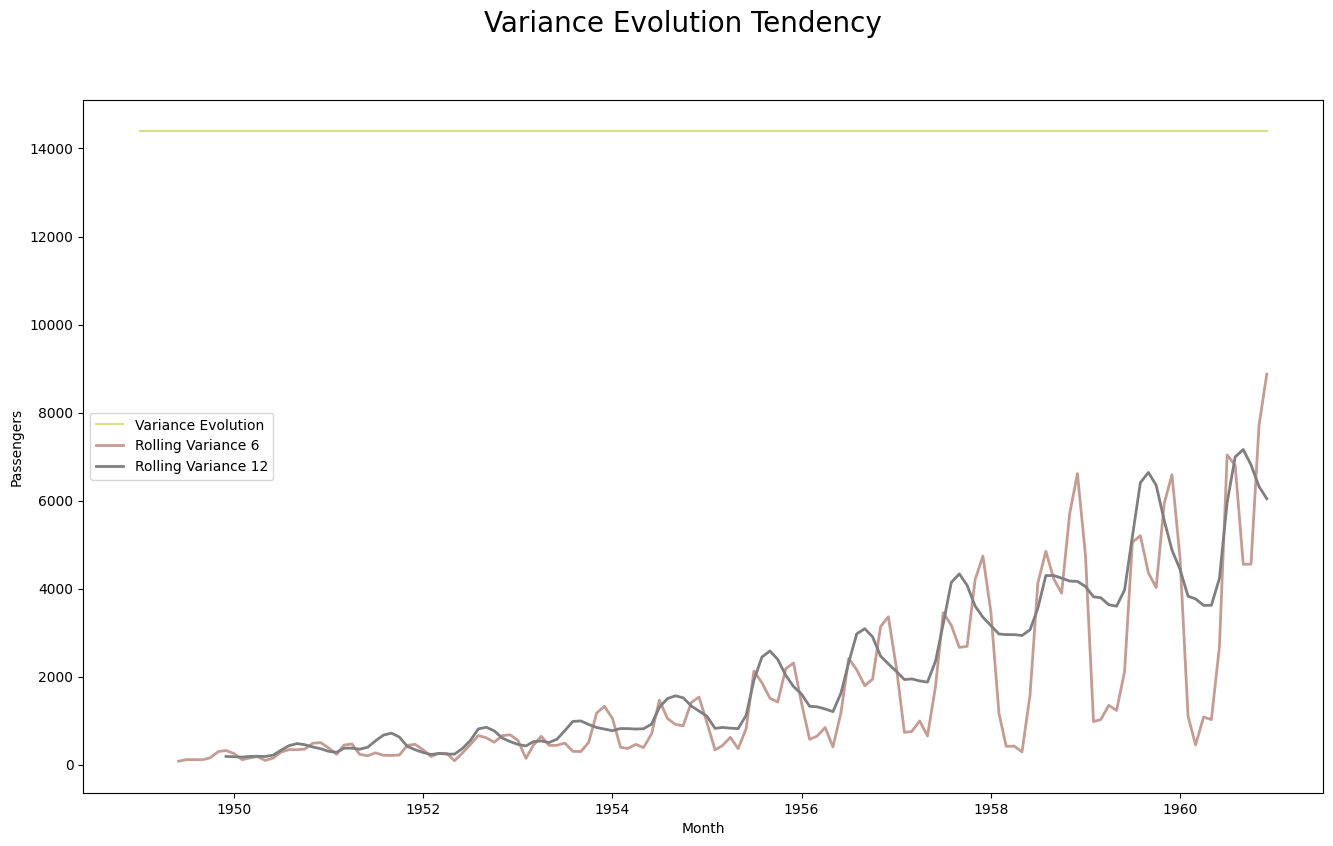

In [10]:
#predictor.plot_data_curves(df)
predictor.plot_data_curves(df.diff().dropna())

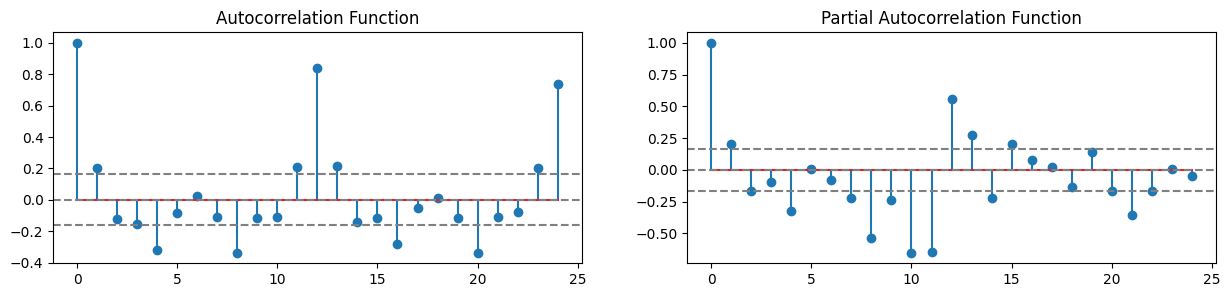

In [11]:
predictor.data
predictor.plot_ACF_PACF()

In [12]:
predictor.load_data(df)
airline=df["Passengers"]
df.index

[ArimaPredictor] DataFrame loaded...


DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [13]:
train, test = predictor.ts_train_test_split(airline ,split_date="1959-01-01")

[ArimaPredictor] Fitting model...
[ArimaPredictor] p:  2
[ArimaPredictor] d:  2
[ArimaPredictor] q:  1
[ArimaPredictor] P:  1
[ArimaPredictor] D:  1
[ArimaPredictor] Q:  1
[ArimaPredictor] s:  12
[ArimaPredictor] Transforming data to log...


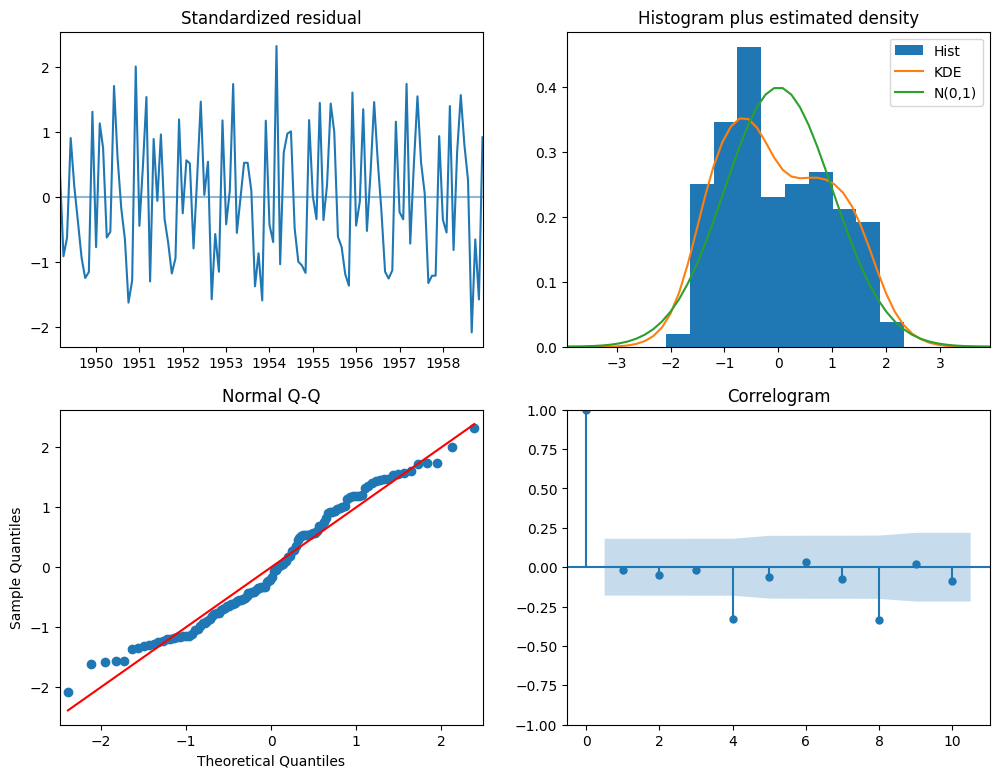

[ArimaPredictor] Model fitted


In [14]:
predictor.fit(data=train, seasonal=False, plot=True, transform_log=True, p=2, d=2, q=1)

[ArimaPredictor] Predicting...
[ArimaPredictor] n_periods:  24
[ArimaPredictor] Prediction done


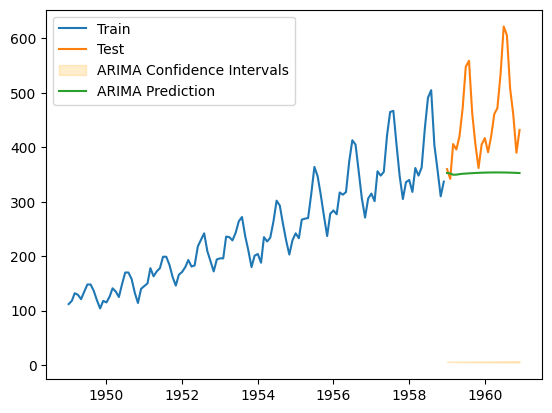

In [15]:
predictor.predict(train, test)